<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_MachineLearning02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/DataScience2022-2/48369ca6b15de055886a512c0be6b83ddf03fac3/5-IntroML/data/housingprice.csv')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
######################## Crea df numerico y categorico
df_num=df.select_dtypes(include=['float64', 'int64'])
df_cat=df.select_dtypes(exclude=['float64', 'int64'])

In [15]:
######################## manejo de valores nulos
imputer = SimpleImputer(strategy="median")
imputer.fit(df_num)
print(imputer.statistics_) # valores de mediana por cada columna numérica
df_tr = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns, index=df_num.index)
df_tr.info() # Valores nulos reemplazados

[7.3050e+02 5.0000e+01 6.9000e+01 9.4785e+03 6.0000e+00 5.0000e+00
 1.9730e+03 1.9940e+03 0.0000e+00 3.8350e+02 0.0000e+00 4.7750e+02
 9.9150e+02 1.0870e+03 0.0000e+00 0.0000e+00 1.4640e+03 0.0000e+00
 0.0000e+00 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 6.0000e+00
 1.0000e+00 1.9800e+03 2.0000e+00 4.8000e+02 0.0000e+00 2.5000e+01
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 6.0000e+00
 2.0080e+03 1.6300e+05]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 no

In [16]:
df_tr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


Media de los datos [1984.86575342]
Varianza de los datos [425.94088197]


(array([187.,  33.,  34.,  38.,  38.,  46.,  57.,  49.,  47.,  51.,  27.,
         21.,  24.,  40.,  58.,  92., 121., 120., 232., 145.]),
 array([-1.6893685 , -1.54400794, -1.39864738, -1.25328681, -1.10792625,
        -0.96256569, -0.81720513, -0.67184457, -0.52648401, -0.38112344,
        -0.23576288, -0.09040232,  0.05495824,  0.2003188 ,  0.34567936,
         0.49103992,  0.63640049,  0.78176105,  0.92712161,  1.07248217,
         1.21784273]),
 <a list of 20 Patch objects>)

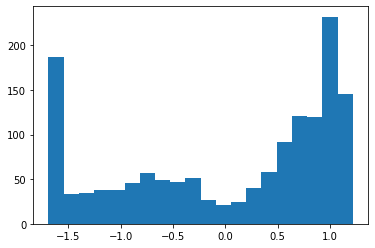

In [18]:
############################## estandarizacion
scaler = StandardScaler() # Creación de objeto StandardScaler
scaler.fit(df[['YearRemodAdd']]) # Cálculo de parámetros de escalamiento
print('Media de los datos', scaler.mean_)
print('Varianza de los datos', scaler.var_)
price_scaled = scaler.transform(df[['YearRemodAdd']]) # Transformación de los datos
plt.hist(price_scaled, bins=20)

In [22]:
##################################################### Transformación de categorías ordinales y nominales

one_hot_encoder = OneHotEncoder()                          # Asignacion a one_hot_encoder de la funcion
one_hot_encoder.fit(df_num[["MSSubClass"]])                        # Estimacion de los parámetros de la col
region_encoded = one_hot_encoder.transform(df_num[["MSSubClass"]]) # Transformamos los datos de df a números
df_encoded = pd.DataFrame(region_encoded.toarray(), columns=one_hot_encoder.categories_[0]) # creacion del df usando region_encoded y los nombres de col one_hot_encoder.categories_
df = pd.concat([df_num, df_encoded], axis=1)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,60,70,75,80,85,90,120,160,180,190
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X = df.drop(["Utilities"], axis=1)
y = df["Utilities"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.info()) # Set de características de datos de training
print(X_test.info()) # Set de características de datos de test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBu